In [1]:
import sys
import string
import itertools
from collections import Counter, defaultdict
import re

from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext line_profiler

In [3]:
data = Path('../data/day_07.txt').read_text()

In [4]:
positions = np.array(sorted([int(k) for k in data.split(',')]))

In [5]:
len(positions), len(Counter(positions))

(1000, 667)

In [6]:
def part_a(positions):
    min_fuel = float('inf')
    for pos in range(positions[0], positions[-1] + 1):
        fuel_required = np.abs(positions - pos).sum()
        if fuel_required < min_fuel:
            min_fuel = fuel_required
    return min_fuel

print(part_a(positions))
%timeit part_a(positions)

344138
7.87 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%lprun -f part_a part_a(positions)

Timer unit: 1e-06 s

Total time: 0.018541 s
File: <ipython-input-6-ec2cfd2c01e8>
Function: part_a at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def part_a(positions):
     2         1          2.0      2.0      0.0      min_fuel = float('inf')
     3      1878        709.0      0.4      3.8      for pos in range(positions[0], positions[-1] + 1):
     4      1877      16353.0      8.7     88.2          fuel_required = np.abs(positions - pos).sum()
     5      1877       1212.0      0.6      6.5          if fuel_required < min_fuel:
     6       359        265.0      0.7      1.4              min_fuel = fuel_required
     7         1          0.0      0.0      0.0      return min_fuel

In [8]:
def part_b(positions):
    min_fuel = float('inf')
    for pos in range(positions[0], positions[-1] + 1):
        arr = np.abs(positions - pos)
        fuel_required = (arr ** 2 + arr).sum()
        if fuel_required < min_fuel:
            min_fuel = fuel_required
    return min_fuel // 2

print(part_b(positions))
%timeit part_b(positions)

94862124
11.4 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%lprun -f part_b part_b(positions)

Timer unit: 1e-06 s

Total time: 0.01941 s
File: <ipython-input-8-90db27476a84>
Function: part_b at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def part_b(positions):
     2         1          3.0      3.0      0.0      min_fuel = float('inf')
     3      1878        629.0      0.3      3.2      for pos in range(positions[0], positions[-1] + 1):
     4      1877       6609.0      3.5     34.0          arr = np.abs(positions - pos)
     5      1877      11107.0      5.9     57.2          fuel_required = (arr ** 2 + arr).sum()
     6      1877        875.0      0.5      4.5          if fuel_required < min_fuel:
     7       483        186.0      0.4      1.0              min_fuel = fuel_required
     8         1          1.0      1.0      0.0      return min_fuel // 2

In [10]:
# %%timeit

n = np.arange(positions[0], positions[-1] + 1)
x = np.zeros((1000, positions[-1] + 1 - positions[0]), dtype=int)
z = np.abs(x + n - positions.reshape(-1,1))
(z * (z + 1)).sum(axis=0).min() // 2, z.sum(axis=0).min()

(94862124, 344138)

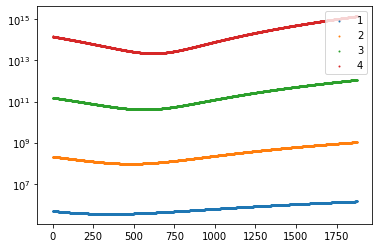

In [11]:
plt.scatter(n, z.sum(axis=0), s=1, label='1')
plt.scatter(n, (z * (z + 1) // 2).sum(axis=0), s=1, label='2')
plt.scatter(n, (z * (z + 1) * (2 * z + 1) // 6).sum(axis=0), s=1, label='3')
plt.scatter(n, ((z * (z + 1) // 2) ** 2).sum(axis=0), s=1, label='4')
plt.yscale('log')
plt.legend()
plt.show()